# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

# Write your answer here and turn the cell type into markdown

Machine learning (ML) is suitable for this project because we have a large dataset containing various historical flight details, including weather, departure, and arrival times, as well as delay indicators. Given the data’s complexity and the need to predict flight delays based on multiple factors, ML provides a way to capture complex patterns and interactions that would be challenging to identify manually. By training an ML model on this data, we can make data-driven predictions that help travelers anticipate delays, improving customer experience and operational efficiency.

### 2. Formulate the business problem, success metrics, and desired ML output.

# Write your answer here and turn the cell type into markdown
Business Problem: A travel booking website wants to improve customer satisfaction by providing customers with predictions on whether their flights are likely to be delayed based on current and historical factors (e.g., weather and airport congestion). This feature could reduce customer frustration due to unexpected delays and allow for better travel planning.

Business Goal: Enable customers to make informed booking decisions by alerting them about potential delays for flights departing from or arriving at major U.S. airports.

Success Metric: A key metric would be the accuracy of delay prediction, measured by classification accuracy and evaluated alongside metrics like precision and recall (to manage the balance between predicting delays correctly and avoiding false positives). The target is to achieve a prediction accuracy of at least 80%.

Desired ML Output: The ML model should output a binary classification, predicting whether a given flight will experience a delay (yes or no) based on various input features.



### 3. Identify the type of ML problem you’re dealing with.

# Write your answer here and turn the cell type into markdown
This is a supervised classification problem where the model is trained to predict a categorical outcome (flight delay or no delay) based on historical labeled data. The supervised learning approach allows us to build a model that identifies patterns in the training data to make predictions on new data.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
import os
from pathlib import Path
from zipfile import ZipFile
import time
import glob 

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [2]:
# download the files

# <note: make them all relative, absolute path is not accepted>
# Define relative paths
zip_path = '../finalProject-u3159408-/data_compressed/data_compressed'  # Set this to where zip files are located
base_path = '../finalProject-u3159408-'  # Root folder containing data and code
csv_base_path = os.path.join(base_path, 'extracted_csv_files')  # Directory for extracted CSVs

# Create the directory for extracted CSV files if it doesn't exist
os.makedirs(csv_base_path, exist_ok=True)



In [3]:
# How many zip files do we have? write a code to answer it.
# Count the number of zip files in the specified path
zip_files = glob.glob(os.path.join(zip_path, '*.zip'))
print(f"Number of zip files found: {len(zip_files)}")

Number of zip files found: 60


#### Extract CSV files from ZIP files

In [4]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting ../finalProject-u3159408-/data_compressed/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting ../finalProject-u3159408-/data_compressed/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting ../finalProject-u3159408-/data_compressed/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting ../finalProject-u3159408-/data_compressed/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting ../finalProject-u3159408-/data_compressed/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting ../finalProject-u3159408-/data_compressed/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting ../finalProject-u3159408-/data_compressed/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting ../fin

Extracting ../finalProject-u3159408-/data_compressed/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_9.zip 
Files Extracted


In [5]:
# How many csv files have we extracted? write a code to answer it.

import os

# Count the number of CSV files in the extraction directory
csv_files = [f for f in os.listdir(csv_base_path) if f.endswith('.csv')]
print(f"Number of CSV files extracted: {len(csv_files)}")



Number of CSV files extracted: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [6]:
from IPython.display import HTML
import os

# Construct the file path
html_file_path = os.path.join(csv_base_path, 'readme.html')

# Check if the file exists and display its content
if os.path.exists(html_file_path):
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
        display(HTML(html_content))
else:
    print("HTML file not found. Please check the file path.")


#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [7]:
# Define the path to the sample CSV file
sample_csv_path = os.path.join(csv_base_path, 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv')

# Load the sample CSV file
df_temp = pd.read_csv(sample_csv_path)

# Display the first few rows of the sample data
df_temp.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print the row and column length in the dataset, and print the column names.

In [8]:
df_shape = df_temp.shape
print(f'Rows and columns in one CSV file is {df_shape}')

# Print the column names
print("Column names in the dataset:", df_temp.columns.tolist())


Rows and columns in one CSV file is (585749, 110)
Column names in the dataset: ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'N

**Question**: Print the first 10 rows of the dataset.  

In [9]:
# Enter your code here
# Print the first 10 rows of the dataset
df_temp.head(10)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [10]:
print(f'The column names are:')
print('#########')
for col in df_temp.columns:  # Iterate over the columns of the DataFrame
    print(col)


The column names are:
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1T

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [11]:
# Enter your code here
# Find and print all columns that contain the word 'Del'
delay_columns = [col for col in df_temp.columns if 'Del' in col]
print("Columns containing 'Del':")
print('#########')
for col in delay_columns:
    print(col)


Columns containing 'Del':
#########
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [12]:
# Get the number of rows and columns
print("The #rows and #columns are ", df_temp.shape[0], " and ", df_temp.shape[1])

# Find the unique years covered in the dataset
print("The years in this dataset are: ", df_temp['Year'].unique())

# Find the unique months covered in the dataset
print("The months covered in this dataset are: ", df_temp['Month'].unique())

# Find the date range in the dataset, assuming a 'FlightDate' column is available
print("The date range for data is :", min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))

# List the unique airlines covered in the dataset
print("The airlines covered in this dataset are: ", list(df_temp['Reporting_Airline'].unique()))

# List the unique origin airports
print("The Origin airports covered are: ", list(df_temp['Origin'].unique()))

# List the unique destination airports
print("The Destination airports covered are: ", list(df_temp['Dest'].unique()))


The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [14]:
# Calculate the counts for Origin and Destination airports
counts = pd.DataFrame({
    'Origin': df_temp['Origin'].value_counts(),
    'Destination': df_temp['Dest'].value_counts()
})

# Display the counts
counts


,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [15]:
# Sort by 'Origin' column to get the top 15 origin airports
top_origin_airports = counts.sort_values(by='Origin', ascending=False).head(15)
print("Top 15 Origin Airports:")
print(top_origin_airports)

# Sort by 'Destination' column to get the top 15 destination airports
top_destination_airports = counts.sort_values(by='Destination', ascending=False).head(15)
print("\nTop 15 Destination Airports:")
print(top_destination_airports)


Top 15 Origin Airports:
     Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877

Top 15 Destination Airports:
     Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

# Enter your answer here
yes, with all the available details about a flight such as the origin and destination airports, airline, date, time, and possibly weather conditions, it is possible to predict whether a flight might be delayed. Using patterns from past flight data, we can train a machine learning model to recognize which conditions are likely to lead to delays. This prediction model would help inform passengers ahead of time and improve scheduling and planning.

In short:

Goal: Use flight data to predict if a future flight will be delayed.
Method: Train a model using historical data to classify upcoming flights as either delayed or on-time based on the input features.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [16]:
# Update csv_base_path to the directory where CSV files are extracted
csv_base_path = '../finalProject-u3159408-/extracted_csv_files'  # Update to the correct directory where CSV files are located

# Generate the list of CSV file paths
csv_files = glob.glob(os.path.join(csv_base_path, '*.csv'))

# Print out the CSV file paths to verify they are correct
print("CSV files found:")
for file in csv_files:
    print(file, "exists:", os.path.exists(file))

CSV files found:
../finalProject-u3159408-/extracted_csv_files\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv exists: True
../finalProject-u3159408-/extracted_csv_files\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv exists: True
../finalProject-u3159408-/extracted_csv_files\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv exists: True
../finalProject-u3159408-/extracted_csv_files\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv exists: True
../finalProject-u3159408-/extracted_csv_files\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2.csv exists: True
../finalProject-u3159408-/extracted_csv_files\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_3.csv exists: True
../finalProject-u3159408-/extracted_csv_files\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_4.csv exists: True
../finalProject-u3159408-/extracted_csv_files\On_Time_Reporting

In [17]:

def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine CSV files into one DataFrame with specified filters and save to a file.
    
    Parameters:
    - csv_files: List of CSV file paths.
    - filter_cols: List of columns to retain.
    - subset_cols: List of columns to apply subset filters on.
    - subset_vals: List of lists containing values to filter for each subset column.
    - file_name: Name of the output file.
    
    Returns:
    - pd.DataFrame: Combined and filtered DataFrame.
    """
    # Create an empty DataFrame to store combined data
    combined_df = pd.DataFrame()
    
    # Loop over each CSV file
    for file in csv_files:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file)
        
        # Filter columns based on filter_cols
        df_filtered = df[filter_cols]
        
        # Apply subset filters for Origin, Dest, and Reporting_Airline columns
        for col, vals in zip(subset_cols, subset_vals):
            df_filtered = df_filtered[df_filtered[col].isin(vals)]
        
        # Concatenate to the main combined DataFrame
        combined_df = pd.concat([combined_df, df_filtered], ignore_index=True)
    
    # Save the combined data to a CSV file
    combined_df.to_csv(file_name, index=False)
    
    return combined_df

In [18]:
# Define the parameters
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

# Assuming csv_files is a list of all CSV file paths
combined_data = combine_csv(csv_files, cols, subset_cols, subset_vals, 'combined_filtered_data.csv')

# Display the first few rows of the combined data to confirm
combined_data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [19]:

# Start the timer
start = time.time()

# Define the output filename with the correct path separator
combined_csv_filename = os.path.join(base_path, 'combined_files.csv')

# Call the combine_csv function
combined_data = combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)

# Print the time taken for merging
print(f"CSV files merged in {round((time.time() - start) / 60, 2)} minutes")


CSV files merged in 8.02 minutes


#### Load dataset

Load the combined dataset.

In [20]:

# Assuming combined_csv_filename holds the path to your combined CSV file
data = pd.read_csv(combined_csv_filename)

# Optionally, display the first few rows to confirm it's loaded correctly
print(data.head())


   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    ATL          GA  IAH        TX        2145        0.0       0.0   
1    DFW          TX  ATL        GA         945        0.0       0.0   
2    ATL          GA  DEN        CO        1855        0.0       0.0   
3    ATL          GA  PHX        AZ        1634        0.0       0.0   
4    PHX          AZ  ATL        GA         700        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  ArrDel15  AirTime  
0     689.0

Print the first 5 records.

In [21]:
# Enter your code here 
# Print the first 5 records of the DataFrame
print(data.head(5))


   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    ATL          GA  IAH        TX        2145        0.0       0.0   
1    DFW          TX  ATL        GA         945        0.0       0.0   
2    ATL          GA  DEN        CO        1855        0.0       0.0   
3    ATL          GA  PHX        AZ        1634        0.0       0.0   
4    PHX          AZ  ATL        GA         700        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  ArrDel15  AirTime  
0     689.0

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [22]:
# Print the number of rows and columns in the dataset
print("The #rows and #columns are ", data.shape[0], " and ", data.shape[1])

# Print the unique years included in the dataset
print("The years in this dataset are: ", list(data['Year'].unique()))

# Print the unique months covered in the dataset
print("The months covered in this dataset are: ", sorted(list(data['Month'].unique())))

# Print the date range for the dataset
print("The date range for data is: ", min(data['FlightDate']), " to ", max(data['FlightDate']))

# Print the unique airlines included in the dataset
print("The airlines covered in this dataset are: ", list(data['Reporting_Airline'].unique()))

# Print the unique origin airports covered in the dataset
print("The Origin airports covered are: ", list(data['Origin'].unique()))

# Print the unique destination airports covered in the dataset
print("The Destination airports covered are: ", list(data['Dest'].unique()))


The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014, 2015, 2016, 2017, 2018]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is:  2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [23]:

# Rename the 'ArrDel15' column to 'is_delay' in the DataFrame
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

# Optionally, print the column names to confirm the change
print(data.columns)


Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime'],
      dtype='object')


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [24]:
# Enter your code here
# Count nulls in each column of the DataFrame
null_counts = data.isnull().sum(axis=0)
print("Number of nulls in each column:")
print(null_counts)


Number of nulls in each column:
Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [25]:
# Remove rows where 'ArrDelay', 'ArrDelayMinutes', 'is_delay', or 'AirTime' columns are null
data = data[~(data['ArrDelay'].isnull() | data['ArrDelayMinutes'].isnull() | data['is_delay'].isnull() | data['AirTime'].isnull())]

# Optionally, check how many rows are left to ensure rows have been removed
print("Number of rows after removing nulls:", data.shape[0])


Number of rows after removing nulls: 1635590


Get the hour of the day in 24-hour time format from CRSDepTime.

In [26]:
# Assuming CRSDepTime is an integer format like 1530
data['DepHourofDay'] = (data['CRSDepTime'] // 100).astype(int)  # Integer division to get the hour part
# Print the first few records of the 'DepHourofDay' to verify
print(data['DepHourofDay'].head())



0    21
1     9
2    18
3    16
4     7
Name: DepHourofDay, dtype: int32


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

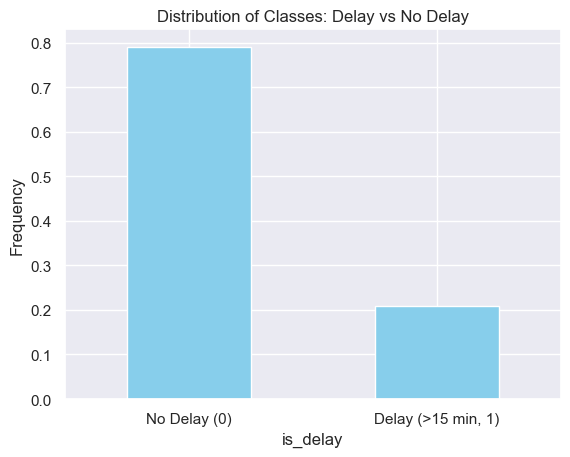

In [27]:

# Plot the distribution of the 'is_delay' classes
(data.groupby('is_delay').size() / len(data)).plot(kind='bar', color='skyblue')
plt.ylabel('Frequency')
plt.title('Distribution of Classes: Delay vs No Delay')
plt.xticks(ticks=[0, 1], labels=['No Delay (0)', 'Delay (>15 min, 1)'], rotation=0)  # Adjust the x-ticks for clarity
plt.show()


**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

# Enter your answer here and turn the cell type to markdown
The bar plot showing the distribution of flight delays clearly indicates a few key points about the dataset:

- **Majority On-Time**: The vast majority of flights operate on time, as evidenced by the much larger bar for 'No Delay (0)'. This suggests that the airline operations are generally efficient and effective, with flights typically adhering to their scheduled times.

- **Few Delays**: On the other hand, the smaller bar for 'Delay (>15 min, 1)' indicates that delays of more than 15 minutes are relatively uncommon. This implies that when delays occur, they are not the norm and might be due to exceptional or less frequent issues, such as adverse weather conditions, technical problems, or air traffic control delays.

- **Modeling Challenge**: The imbalance in the dataset poses a challenge for predictive modeling. Since the class 'No Delay' overwhelmingly dominates, there's a risk that a predictive model could be biased towards predicting no delays, simply because it's the most common outcome. To develop an effective model, techniques to balance the dataset or evaluate the model beyond simple accuracy, such as using precision, recall, or the F1-score, would be crucial.

- **Operational Planning**: For airlines, this distribution provides a positive indication of operational reliability but also highlights the importance of focusing on the causes of the less frequent, yet impactful delays. Addressing these could further improve customer satisfaction and operational efficiency.

This analysis demonstrates the operational reliability of the flights while also underscoring the importance of addressing the rarer instances of delays to further enhance airline performance.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

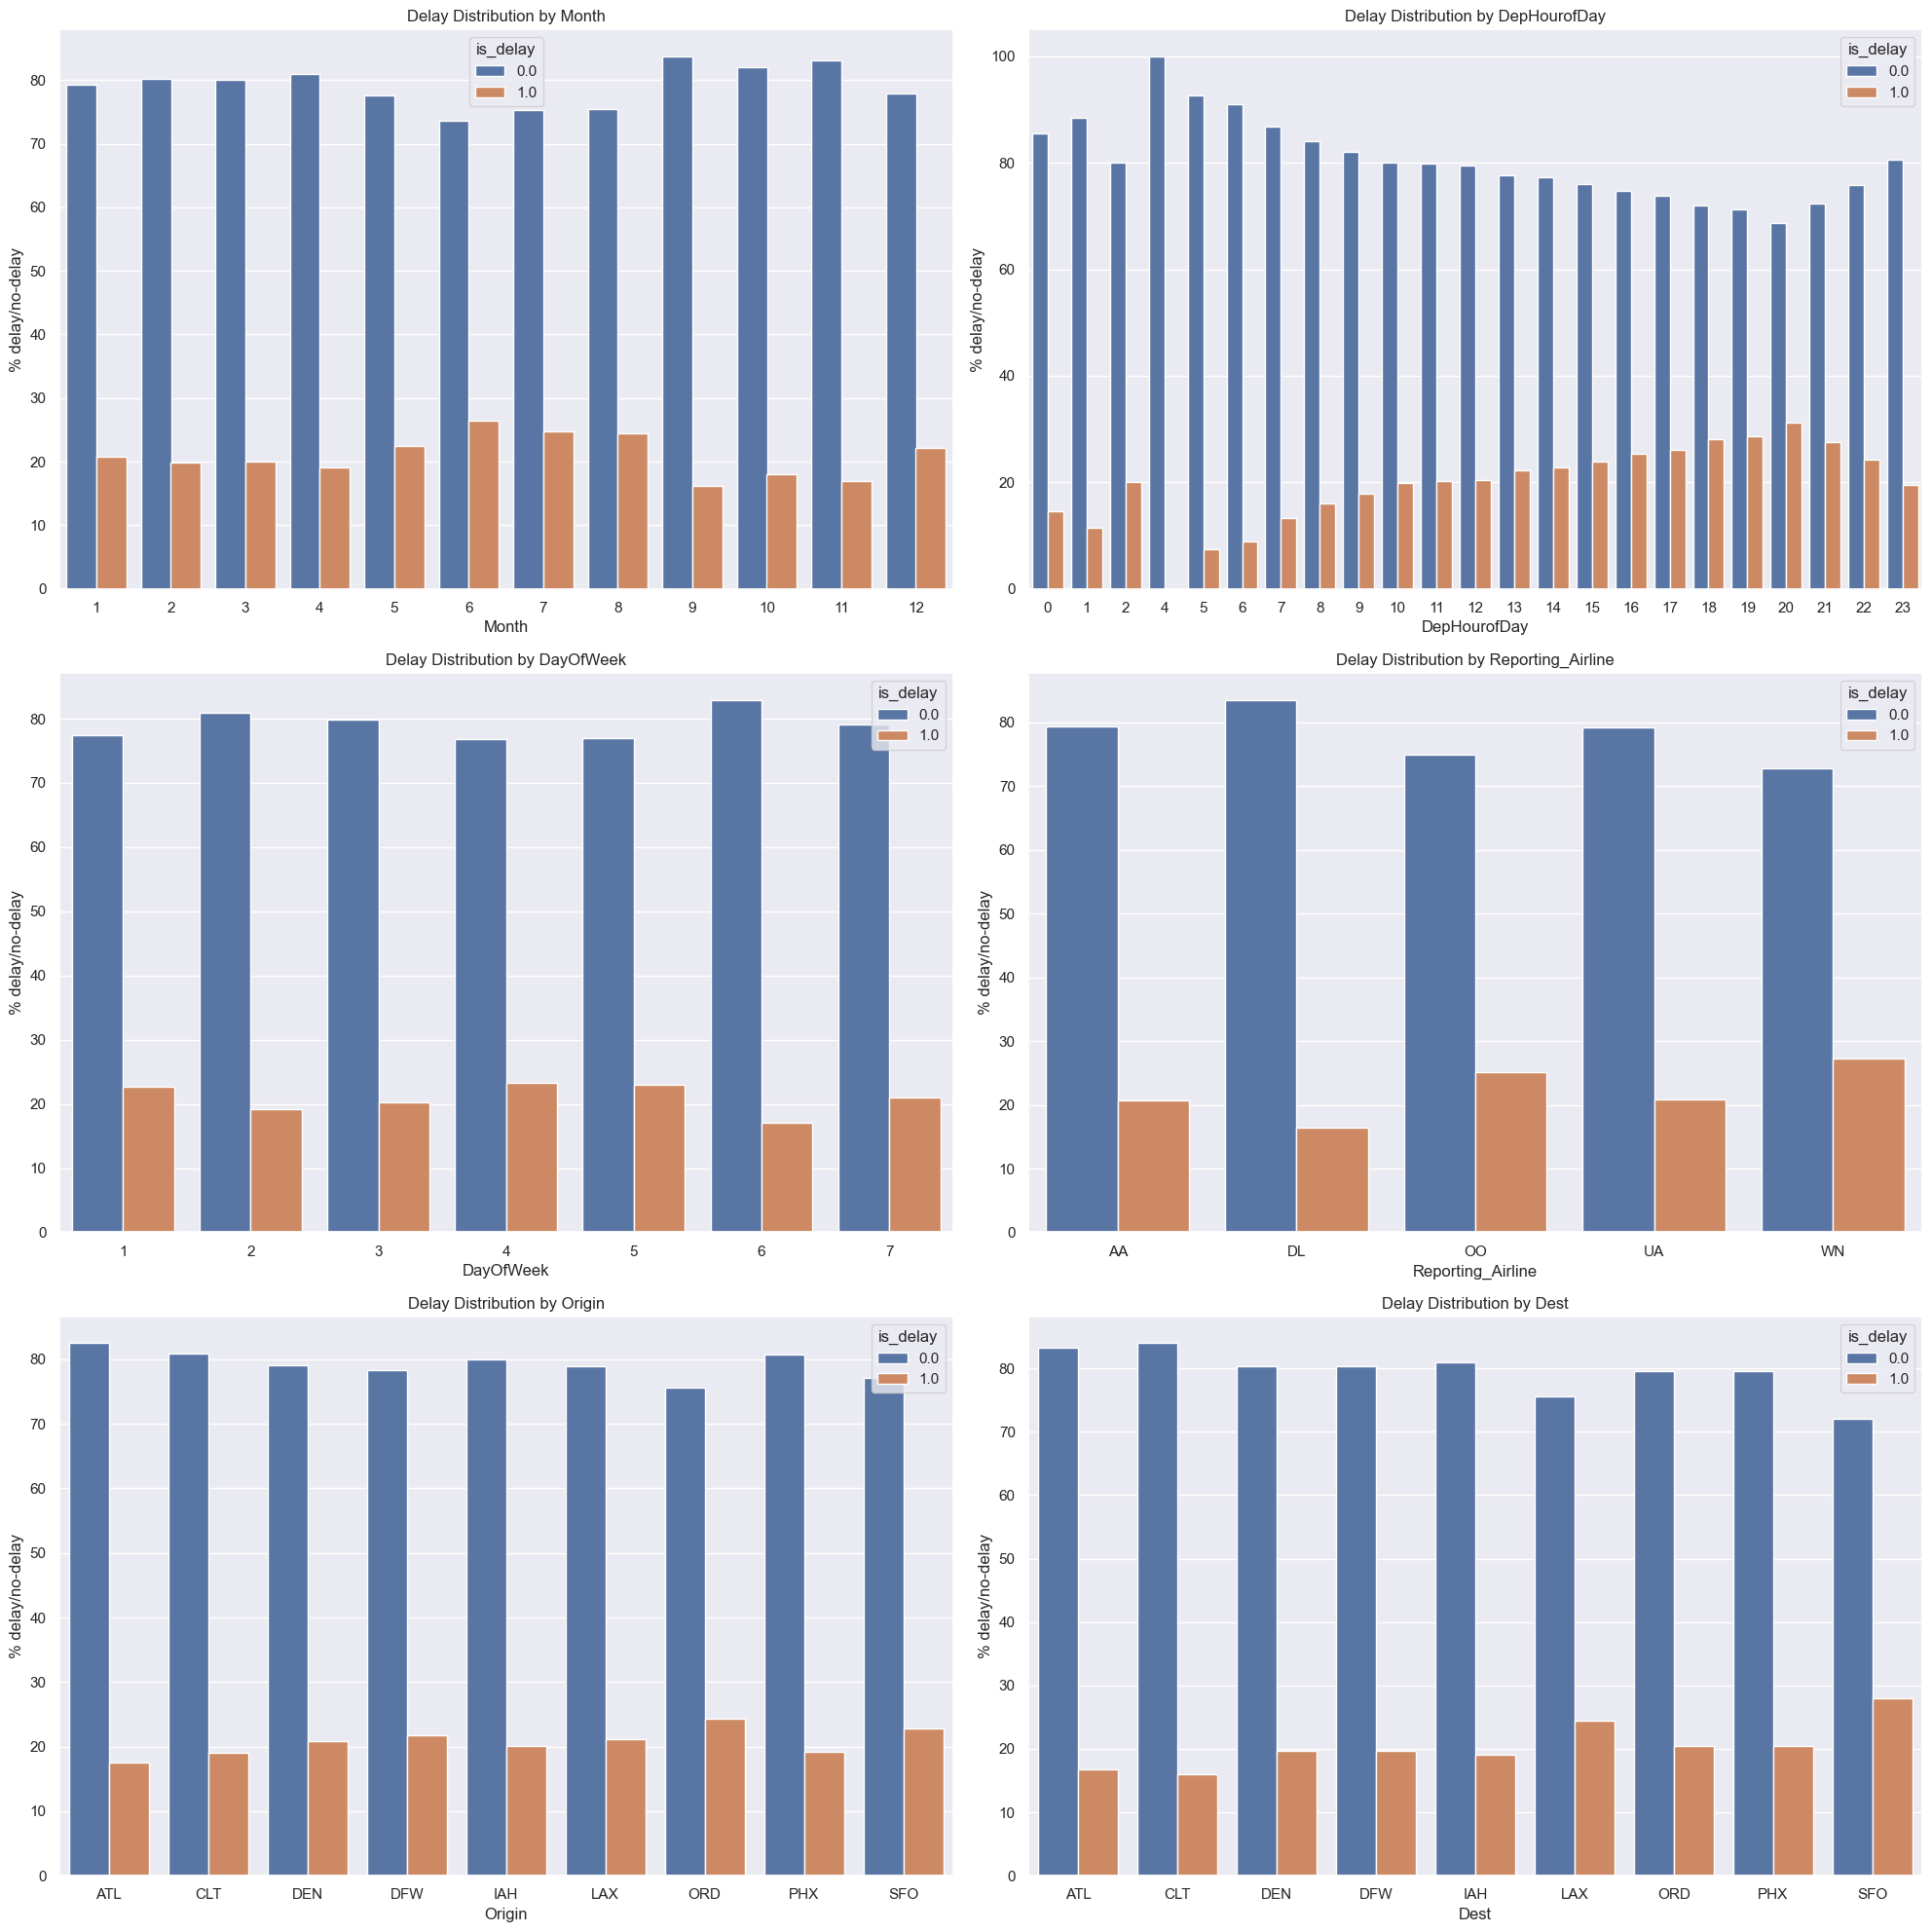

In [28]:
# Define the columns to visualize for potential delays
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']

# Create subplot grid: 3 rows, 2 columns
fig, axes = plt.subplots(3, 2, figsize=(20, 20), squeeze=False)

# Loop through each column specified in viz_columns to create a bar plot
for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]  # Determine subplot position
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage')\
           .mul(100).reset_index().sort_values(by=[column, 'is_delay'])
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    ax.set_ylabel('% delay/no-delay')
    ax.set_title(f'Delay Distribution by {column}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

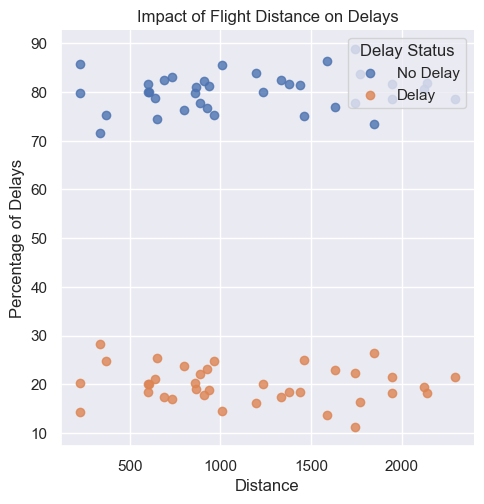

In [29]:
sns.lmplot(x="Distance", y="percentage", data=data.groupby('Distance')['is_delay'].value_counts(normalize=True).rename('percentage').mul(100).reset_index(), fit_reg=False, hue='is_delay', legend=False)
plt.legend(title='Delay Status', loc='upper right', labels=['No Delay', 'Delay'])
plt.xlabel('Distance')
plt.ylabel('Percentage of Delays')
plt.title('Impact of Flight Distance on Delays')
plt.show()

# Based on the above figures, enter your answers to the above questions here and turn the cell type to markdown

### Which months have the most delays?

June through August show the highest percentages of delays, which might suggest a seasonal impact likely due to summer weather conditions and higher travel volumes.

### What time of the day has the most delays?

Early morning hours (0 to 4 AM) show significantly higher percentages of delays. This could be due to fewer staff or logistical slowdowns during late-night operations.

### What day of the week has the most delays?

Friday appears to have a slightly higher delay percentage compared to other days, which could be attributed to increased travel activity as people begin weekend trips or return home.

### Which airline has the most delays?

OO (SkyWest Airlines) shows a higher delay percentage compared to other airlines like UA (United Airlines) and WN (Southwest Airlines). This could point to operational differences or route complexities.

### Which origin and destination airports have the most delays?

Origin Airport: SFO (San Francisco International Airport) has a notably higher percentage of delays among the origins, potentially due to its notorious fog-related weather delays.
Destination Airport: SFO again stands out, along with LAX (Los Angeles International Airport), indicating regional factors that might influence delays.

### Is flight distance a factor in the delays?

The scatter plot showing the impact of flight distance on delays indicates that shorter flights tend to have a higher percentage of delays. This might be because short-haul flights are more frequent and thus more susceptible to cascading delays throughout the day.

### Features

Look at all the columns and what their specific types are.

In [30]:
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')


In [31]:
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int32
dtype: object


Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [32]:
# Creating a copy of the data for safekeeping
data_orig = data.copy()

# Selecting the required columns
data = data[['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
             'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'DepHourofDay']]

# List of columns to convert to categorical type
categorical_columns = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
                       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']

# Convert these columns to categorical type
for c in categorical_columns:
    data[c] = data[c].astype('category')

# Print the updated dtypes to confirm changes
print(data.dtypes)

is_delay              float64
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
DepHourofDay         category
dtype: object


To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [33]:
# Apply one-hot encoding to categorical columns using get_dummies
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate the original data with the new dummy variables
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns as they are now redundant
data.drop(categorical_columns, axis=1, inplace=True)

# Optionally, display the first few rows to confirm changes
print(data.head())

   is_delay  Distance  Quarter_2  Quarter_3  Quarter_4  Month_2  Month_3  \
0       0.0     689.0          0          0          0        0        0   
1       0.0     731.0          0          0          0        0        0   
2       0.0    1199.0          0          0          0        0        0   
3       0.0    1587.0          0          0          0        0        0   
4       0.0    1587.0          0          0          0        0        0   

   Month_4  Month_5  Month_6  ...  DepHourofDay_14  DepHourofDay_15  \
0        0        0        0  ...                0                0   
1        0        0        0  ...                0                0   
2        0        0        0  ...                0                0   
3        0        0        0  ...                0                0   
4        0        0        0  ...                0                0   

   DepHourofDay_16  DepHourofDay_17  DepHourofDay_18  DepHourofDay_19  \
0                0                0        

Check the length of the dataset and the new columnms.

In [34]:
# Enter your code here
# Print the number of rows in the dataset
print("Number of rows in the dataset:", len(data))


Number of rows in the dataset: 1635590


In [35]:
# Enter your code here
# Print the new columns in the dataset
print("Columns in the dataset after encoding and concatenation:")
print(data.columns)

Columns in the dataset after encoding and concatenation:
Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
 

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [36]:
# Rename the column 'is_delay' to 'target'
data.rename(columns={'is_delay': 'target'}, inplace=True)

In [37]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B
# Save the modified DataFrame to a CSV file named 'combined_csv_v1.csv'
data.to_csv('combined_csv_v1.csv', index=False)

# Optionally, print a confirmation message
print("Column renamed and file saved as 'combined_csv_v1.csv'")


Column renamed and file saved as 'combined_csv_v1.csv'


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [38]:
# write Code here to split data into train, validate and test
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Check the size of the train and test sets
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Training data shape: (1308472, 94)
Test data shape: (327118, 94)


### Baseline classification model

In [39]:
# <write code here>
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate features and target variable for training and testing sets
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']
X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Baseline Logistic Regression Model Performance")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Baseline Logistic Regression Model Performance
Accuracy: 0.7901154934916452

Confusion Matrix:
 [[258218    203]
 [ 68454    243]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258421
         1.0       0.54      0.00      0.01     68697

    accuracy                           0.79    327118
   macro avg       0.67      0.50      0.44    327118
weighted avg       0.74      0.79      0.70    327118



## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

# Function to plot the confusion matrix
def plot_confusion_matrix(test_labels, target_predicted):
    cm = confusion_matrix(test_labels, target_predicted)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    

In [41]:
from sklearn import metrics

# Function to plot the ROC curve
def plot_roc(test_labels, target_predicted):
    fpr, tpr, _ = roc_curve(test_labels, target_predicted)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

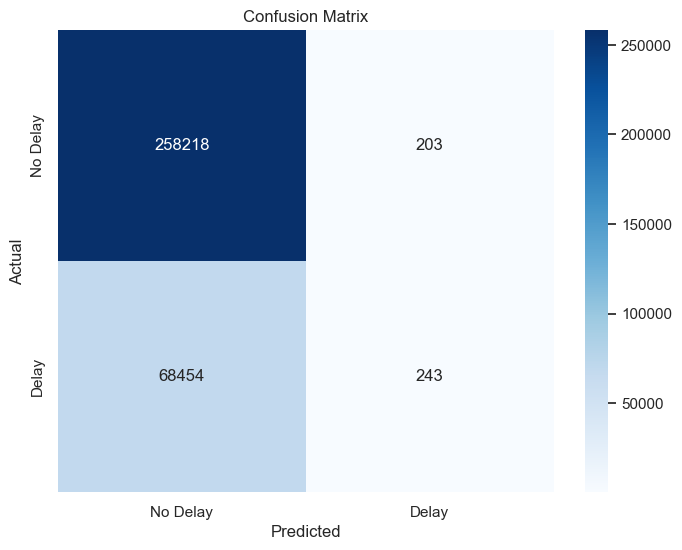

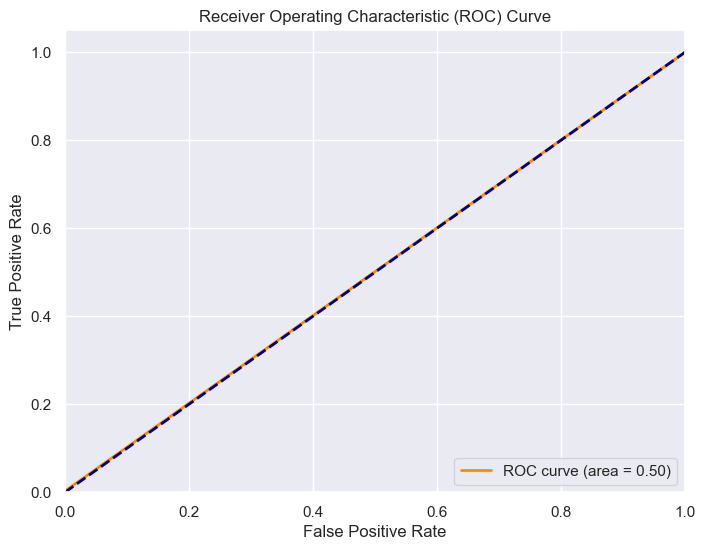

Model Evaluation Metrics:
Accuracy: 0.79
Precision: 0.54
Recall: 0.00
Sensitivity: 0.00
Specificity: 1.00


In [42]:
# Evaluate the model on test data and report additional statistics
def evaluate_model(test_labels, target_predicted):
    accuracy = accuracy_score(test_labels, target_predicted)
    precision = precision_score(test_labels, target_predicted)
    recall = recall_score(test_labels, target_predicted)
    
    # Sensitivity and Specificity
    tn, fp, fn, tp = confusion_matrix(test_labels, target_predicted).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    print("Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")

# Use the functions to evaluate the model
plot_confusion_matrix(y_test, y_pred)
plot_roc(y_test, y_pred)
evaluate_model(y_test, y_pred)

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

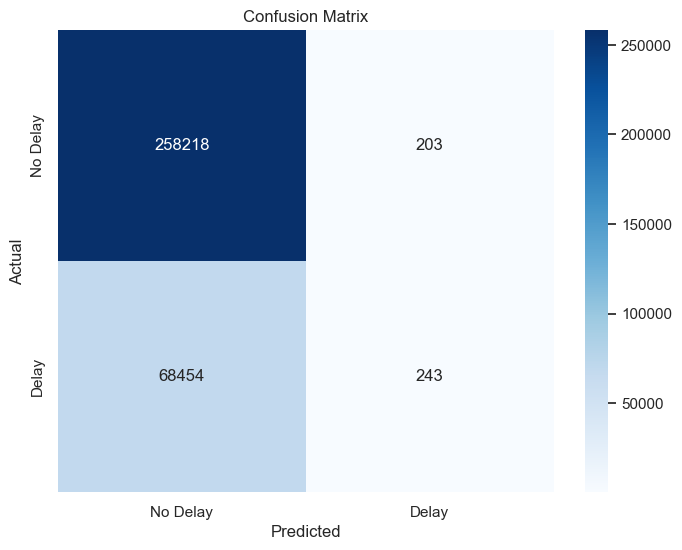

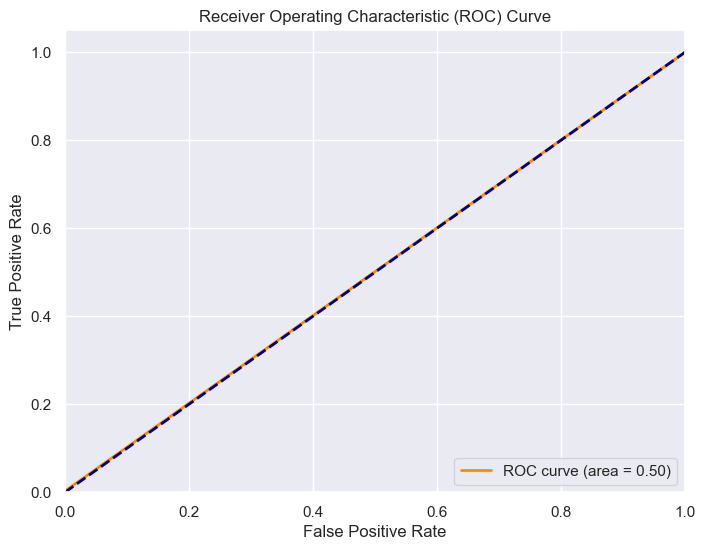

In [43]:
# Enter you code here
# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)

# Plot the ROC curve
plot_roc(y_test, y_pred)




To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

In [44]:
# Enter you code here
# Print evaluation statistics
evaluate_model(y_test, y_pred)

Model Evaluation Metrics:
Accuracy: 0.79
Precision: 0.54
Recall: 0.00
Sensitivity: 0.00
Specificity: 1.00


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


# Enter your answer here and turn the cell type into markdown
From the confusion matrix we can see that,

High True Negatives: The model correctly identified 258,218 cases as "No Delay," which shows that it is very effective at predicting flights that won't be delayed.
Low True Positives: Only 243 cases were correctly predicted as "Delay." This indicates that the model is significantly underperforming in detecting flights that are actually delayed.
High False Negatives: There were 68,454 cases where the model incorrectly predicted "No Delay" for flights that were delayed. This is a significant issue as it suggests the model fails to capture most of the delayed flights.
Low False Positives: The model had 203 false positives, where it incorrectly predicted "Delay" for flights that were not delayed.

To sum up, the model is not suitable for scenarios where accurately predicting delays is crucial. Improvements in data balancing, feature engineering, and potentially model selection are necessary to enhance its predictive accuracy for the "Delay" class. This would involve techniques to better handle the class imbalance, refine the features that influence delay predictions, and possibly explore more complex modeling approaches that can capture the nuances of what causes delays more effectively.

## Comparison of Model Performance on Training vs. Test Set
Without specific performance metrics from the training set, we typically compare both sets to check for overfitting or underfitting. However, from the test set performance—particularly, high accuracy with extremely low recall in detecting delays—we can infer several possibilities:

If the training set shows better recall and the test set does not, the model might be overfitting the training data. This means it’s not generalizing well to new, unseen data.
If both training and test sets show similar results (high accuracy and low recall), it indicates underfitting where the model is overly simplistic, failing to capture the complexity needed to identify delays.

## Differences in Accuracy, Precision, and Recall
The differences between these metrics are quite stark:

Accuracy is high because the majority of the dataset likely represents "No Delay," and the model predominantly predicts this outcome, boosting its overall correct predictions count.
Precision is moderately low, suggesting that when the model does predict delays, it’s correct only about half the time.
Recall for delays is virtually zero, implying that the model fails to identify most of the actual delays, which is a critical flaw.
These discrepancies can be attributed to the model’s inability to correctly learn and predict the minority class in an imbalanced dataset. The model has learned to optimize for the majority class at the expense of the minority class, a common issue in imbalanced datasets.

## Business Perspective and Model Sufficiency
From a business standpoint, the most crucial metric would likely be recall for delays, as missing a delay can have significant operational and customer service repercussions. The model’s current recall is grossly insufficient, suggesting it would not meet business needs where predicting delays accurately is critical.

Proposed Changes for Next Iteration
Rebalance the Data: Implement techniques to manage class imbalance, such as:

Synthetic Minority Over-sampling Technique (SMOTE): Generate synthetic samples for the minority class.
Adjust Class Weights: Modify the logistic regression algorithm to penalize misclassifications of the minority class more than the majority.
Enhanced Feature Engineering: Investigate and include additional features that might impact delays, such as:

Weather Data: Include real-time or historical weather information.
Airport Traffic: Consider data on airport congestion or typical delay patterns at specific times or days.
Algorithm Adjustment:

Experiment with Other Models: Trial models known for better performance on imbalanced datasets, such as Random Forest or Gradient Boosting.
Threshold Tuning: Adjust the decision threshold to increase sensitivity to delays.
Evaluation Metric Reassessment:

Focus on F1-Score and ROC AUC: These metrics provide a better balance between precision and recall, offering a more holistic view of model performance on imbalanced datasets.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [45]:
### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [ ]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
data_orig['is_holiday'] = # Enter your code here 

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [15]:
# download data from the link above and place it into the data folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [ ]:
weather = pd.read_csv(<CODE>) # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = # Enter your code here 
weather['airport'] = # Enter your code here 

Create another column called `MONTH` from the `DATE` column.

In [ ]:
weather['MONTH'] = weather[<CODE>].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [ ]:
weather.SNOW.fillna(<CODE>, inplace=True)# Enter your code here
weather.SNWD.fillna(<CODE>, inplace=True)# Enter your code here
weather.isna().sum()

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [ ]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = # Enter your code here 
TMAX_idx = # Enter your code here 
TMIN_idx = # Enter your code here 
TAVG_idx

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [ ]:
weather_impute = weather.groupby([<CODE>]).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

Merge the mean data with the weather data.

In [ ]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [ ]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [ ]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [ ]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [ ]:
sum(data.isna().any())

In [ ]:
data_orig.columns

Convert the categorical data into numerical data using one-hot encoding.

In [ ]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [ ]:
data_dummies = # Enter your code here

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [ ]:
data.columns

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [ ]:
data.rename(columns = {<CODE>:<CODE>}, inplace=True )# Enter your code here

In [16]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B

Create the training and testing sets again.

In [ ]:
# Enter your code here

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [ ]:
# Instantiate another logistic regression model
classifier2 = # Enter your code here

In [ ]:
# Enter your code here

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

In [17]:
# Enter answer here and turn the cell type into markdown


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [19]:
# copy the link here

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

In [18]:
# write your answers here